### 1. Declarar líbrerias

In [ ]:
# Librerias de manipulación de datos
import pandas as pd
import numpy as np
# Librerias de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
# Técnicas estadisticas
import statsmodels.api as sm

# Librerias de Machine Learning por SKLearn
# Modelos analiticos, Modelamiento, metricas de modelamiento, selección de variables,
# clusterización
from sklearn.model_selection import train_test_split # Parte el train y el test
from sklearn.preprocessing import MinMaxScaler # Calcular distancias
from sklearn.neighbors import KNeighborsClassifier # Calcular el algtmo KNN
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans

# Control de versiones
#import pandas_profiling as pp
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Determina la ruta de conexión
# pwd

### 2. Cargar los Datos

In [ ]:
df =pd.read_excel('Empresas_Reactiva_Perú.xlsx')
df = pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71553 entries, 0 to 71552
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RUC              71553 non-null  float64
 1   NOMBRE_EMPRESA   71553 non-null  object 
 2   SECTOR           71553 non-null  object 
 3   BANCO            71553 non-null  object 
 4   MONTO_PRESTAMO   71553 non-null  float64
 5   FLG_1MM          71553 non-null  int64  
 6   MONTO_COBERTURA  71553 non-null  float64
 7   DEPARTAMENTO     71553 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 4.4+ MB


In [ ]:
df.isnull().sum()
# Indentificamos que no hay nulos

RUC                0
NOMBRE_EMPRESA     0
SECTOR             0
BANCO              0
MONTO_PRESTAMO     0
FLG_1MM            0
MONTO_COBERTURA    0
DEPARTAMENTO       0
dtype: int64

In [ ]:
df.head(3)

,RUC,NOMBRE_EMPRESA,SECTOR,BANCO,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,DEPARTAMENTO
0,2.052055e+10,1 ONE S.A.C.,COMERCIO,CRÉDITO,1894383.0,1,1704944.7,LIMA
1,2.054319e+10,1000 MILLAS SAC,COMERCIO,CRÉDITO,300570.0,0,270513.0,LIMA
2,2.037972e+10,100PRE FELIZ SAC,"AGRICULTUR, GANADERIA, CAZA Y SILVICULTURA",BANCO BBVA PERU,1370000.0,1,1233000.0,LIMA


In [ ]:
df.shape

(71553, 8)

In [ ]:
df1 = pd.read_excel('Income.xlsx')
df1 = pd.DataFrame(df1)
df1.head(n=10)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71556 entries, 0 to 71555
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RUC     71553 non-null  float64
 1   INCOME  71553 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


In [ ]:
df1.head(3)

,RUC,INCOME
0,2.052055e+10,5.903929e+08
1,2.054319e+10,9.367398e+07
2,2.037972e+10,1.701463e+07


In [ ]:
# Mezclamos el DF original con el de los ingresos de las empresas
# Se usan los Joins
df2 = pd.merge(df, df1, on='RUC')

In [ ]:
df2.head(3)

,RUC,NOMBRE_EMPRESA,SECTOR,BANCO,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,DEPARTAMENTO,INCOME
0,2.052055e+10,1 ONE S.A.C.,COMERCIO,CRÉDITO,1894383.0,1,1704944.7,LIMA,5.903929e+08
1,2.054319e+10,1000 MILLAS SAC,COMERCIO,CRÉDITO,300570.0,0,270513.0,LIMA,9.367398e+07
2,2.037972e+10,100PRE FELIZ SAC,"AGRICULTUR, GANADERIA, CAZA Y SILVICULTURA",BANCO BBVA PERU,1370000.0,1,1233000.0,LIMA,1.701463e+07


### 3. Exploración de datos

In [ ]:
df2.describe()

,RUC,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,INCOME
count,7.155500e+04,7.155500e+04,71555.000000,7.155500e+04,7.155500e+04
mean,1.813928e+10,3.458738e+05,0.068004,3.023223e+05,5.046760e+07
std,4.317413e+09,1.144353e+06,0.251754,9.394681e+05,1.875405e+08
min,1.000001e+10,5.000000e+02,0.000000,4.900000e+02,1.645633e+03
25%,2.010885e+10,2.033050e+04,0.000000,1.992389e+04,3.750019e+06
50%,2.051203e+10,5.500000e+04,0.000000,5.225000e+04,1.107159e+07
75%,2.056128e+10,1.764340e+05,0.000000,1.676123e+05,3.366441e+07
max,2.060600e+10,1.000000e+07,1.000000,8.000000e+06,7.373653e+09


In [ ]:
# Quita la potencia de e^#, cambia el tipo de formato
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
print(df2)

                 RUC                              NOMBRE_EMPRESA  \
0     20520549740.00                                1 ONE S.A.C.   
1     20543190617.00                           1000 MILLAS SAC     
2     20379719440.00                            100PRE FELIZ SAC   
3     20602664091.00                                    1010 SAC   
4     20601455375.00  105 EMERGENCIAS Y SOLUCIONES AQP E.I.R.L.    
...              ...                                         ...   
71550 20516356988.00                ZWAIMEA BAYZ S.R.L. S.C.R.L.   
71551 20545390966.00                ZWEI HUNDE INGENIEROS S.A.C.   
71552 20602102018.00                     ZX CORPORATION S.A.C.     
71553 20512321357.00                                ZYTRUST S.A.   
71554 20515793489.00                        ZZ INTERNACIONAL SAC   

                                           SECTOR            BANCO  \
0                                        COMERCIO          CRÉDITO   
1                                        CO

In [ ]:
df2.describe()

,RUC,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,INCOME
count,71555.00,71555.00,71555.00,71555.00,71555.00
mean,18139283309.37,345873.84,0.07,302322.29,50467597.53
std,4317413281.14,1144352.80,0.25,939468.10,187540502.83
min,10000006209.00,500.00,0.00,490.00,1645.63
25%,20108847754.00,20330.50,0.00,19923.89,3750018.65
50%,20512027084.00,55000.00,0.00,52250.00,11071589.86
75%,20561283580.00,176434.00,0.00,167612.30,33664411.68
max,20606001419.00,10000000.00,1.00,8000000.00,7373652651.55


In [ ]:
# Creamos variables que complemneten el análisis
#CREAMOS EL % DE COBERTURA:
# Monto de prestamo: prestamo del Banco
# Monto de cobertura: el monto que el estado que iba a coberturarle al banco
# en caso que la empresa no pague

df2['PORCENTAJE_COBERTURA'] = df2['MONTO_COBERTURA'] / df2['MONTO_PRESTAMO']

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71555 entries, 0 to 71554
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RUC                   71555 non-null  float64
 1   NOMBRE_EMPRESA        71555 non-null  object 
 2   SECTOR                71555 non-null  object 
 3   BANCO                 71555 non-null  object 
 4   MONTO_PRESTAMO        71555 non-null  float64
 5   FLG_1MM               71555 non-null  int64  
 6   MONTO_COBERTURA       71555 non-null  float64
 7   DEPARTAMENTO          71555 non-null  object 
 8   INCOME                71555 non-null  float64
 9   PORCENTAJE_COBERTURA  71555 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
df2.head(3)

,RUC,NOMBRE_EMPRESA,SECTOR,BANCO,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,DEPARTAMENTO,INCOME,PORCENTAJE_COBERTURA
0,20520549740.00,1 ONE S.A.C.,COMERCIO,CRÉDITO,1894383.00,1,1704944.70,LIMA,590392875.16,0.90
1,20543190617.00,1000 MILLAS SAC,COMERCIO,CRÉDITO,300570.00,0,270513.00,LIMA,93673975.37,0.90
2,20379719440.00,100PRE FELIZ SAC,"AGRICULTUR, GANADERIA, CAZA Y SILVICULTURA",BANCO BBVA PERU,1370000.00,1,1233000.00,LIMA,17014629.00,0.90


In [ ]:
# Calculo la correlación de las 4 variables numericas de interes
corr = df2[['MONTO_PRESTAMO','MONTO_COBERTURA','INCOME','PORCENTAJE_COBERTURA','FLG_1MM']].corr().round(4)
corr

# Mientras las variables menos se correlacionen van a poder brindar info diferente para la segmentación

,MONTO_PRESTAMO,MONTO_COBERTURA,INCOME,PORCENTAJE_COBERTURA,FLG_1MM
MONTO_PRESTAMO,1.00,1.00,0.56,-0.74,0.73
MONTO_COBERTURA,1.00,1.00,0.57,-0.74,0.76
INCOME,0.56,0.57,1.00,-0.48,0.46
PORCENTAJE_COBERTURA,-0.74,-0.74,-0.48,1.00,-0.61
FLG_1MM,0.73,0.76,0.46,-0.61,1.00


In [ ]:
# Ya que monto de el Monto_P y Monto_C tienen una relación perfecta,
#directamente proporcional, podemos descartar una de las dos
# En este caso, nos quedamos con Monto_P ya que es un dato más relevante los negocios

In [ ]:
X=np.array(df2[['PORCENTAJE_COBERTURA','MONTO_PRESTAMO','INCOME']])
X.shape

(71555, 3)

### 4. Modelado

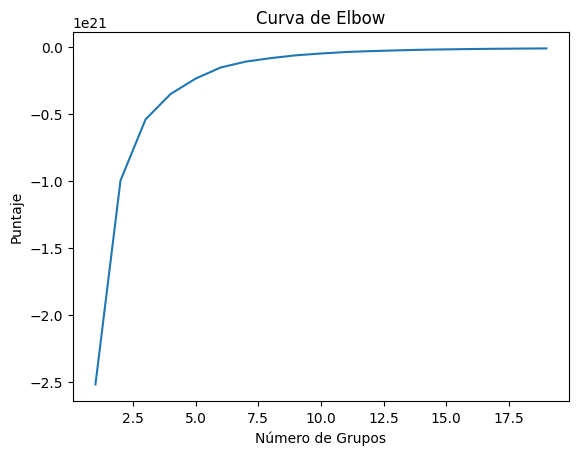

In [ ]:
# ITERAMOS EN UNA ESCALA DE 0 A 20 CLUSTERS
# Y DESIDICIR SEGÚN EL GRATICO EL VALOR DEL CLUSTER DONDE SE GENERA EL CODO
# Defino mi rango de clusters
Nc = range(1, 20)
# En el KMeans va a entrenar 1 a 1 hasta el rango Nc
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
# Para ver el valor
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de Grupos')
plt.ylabel('Puntaje')
plt.title('Curva de Elbow')
plt.show()

In [ ]:
# Del grafico de puede interpretar que el punto de codoesta entre en
# un valor entre (4,-0.5)

In [ ]:
# Yo tomo la decisión de definir el numero de Clusters según el grafico
num_clusters = 4

In [ ]:
# Defino las variables que estamos trabajando
data=df2[['PORCENTAJE_COBERTURA','MONTO_PRESTAMO','INCOME']]

In [ ]:
#Segmentación de KMEANS
# Entrenamos el modelo
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
kmeans.fit(data)

KMeans(n_clusters=4, n_init=10)

In [ ]:
# Calculamos los clusters en base a las distancias que hay
def form_cluster(x,k):
    no_clusters = k
    model = KMeans(n_clusters=no_clusters,init='random')
    model.fit(x)
    labels = model.labels_
    print(labels)

    # Cacluate the silhouette (Centriode) score
    sh_score = silhouette_score(x,labels)
    return sh_score

In [ ]:
prediction = kmeans.predict(data)

In [ ]:
prediction

array([0, 2, 2, ..., 2, 0, 2], dtype=int32)

In [ ]:
# Convertimos la predicción en un Data Frame
pronosseg = pd.DataFrame(prediction)

In [ ]:
# Le estoy poniendo el nombre de Segmento
pronosseg.columns=['Segmento']

In [ ]:
# Pronostico de Segmento
pronosseg.head()

,Segmento
0,0
1,2
2,2
3,2
4,2


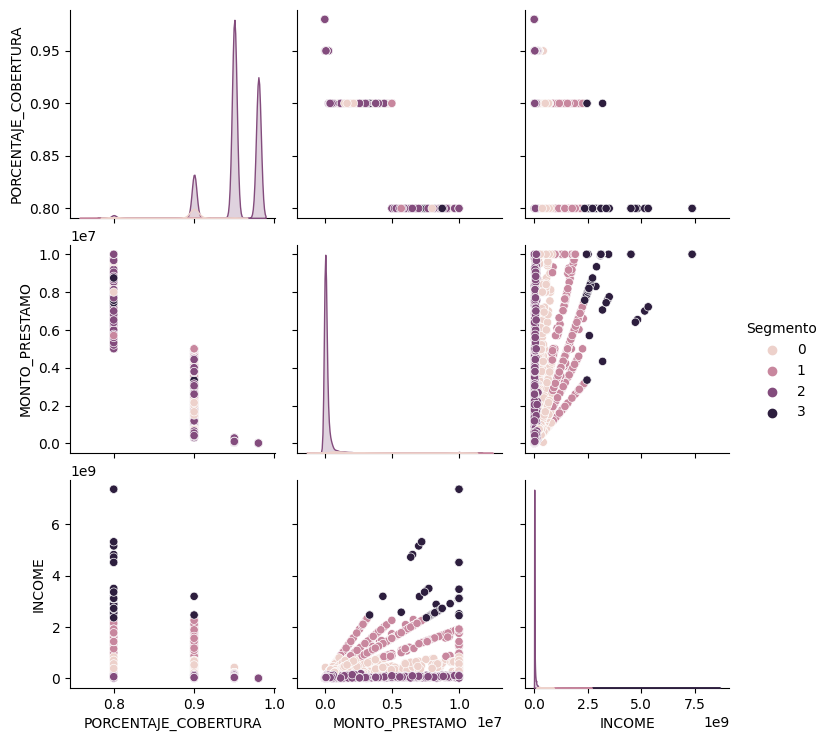

In [ ]:
# Ver el grafico donde se cruza las tres variables entre ellas
# para ver como se discriminan
sns.pairplot(pd.concat([data,pronosseg],axis=1), hue="Segmento")

In [ ]:
# Estamos concatemando la data que tenia con la predicción
# la estamos agrupando por segmento y le estamos sacando el promedio
res1=pd.concat([data,pronosseg],axis=1).groupby(['Segmento']).mean()
res1.style.applymap(lambda x: 'background-color : yellow' if x>res1.iloc[0,0] else '')

,PORCENTAJE_COBERTURA,MONTO_PRESTAMO,INCOME
Segmento,,,
0,0.893907,1850980.269906,346892082.434581
1,0.862363,5350686.172829,1321159188.787853
2,0.954224,230219.192256,23427614.122556
3,0.803000,9180699.733750,3381509479.173045


In [ ]:
pronosseg.head()

,Segmento
0,3
1,0
2,0
3,0
4,0


In [ ]:
# Concateno el df original con el pronostico y obtengo la data final
data_final=pd.concat([df2,pronosseg],axis=1)

In [ ]:
data_final.head(3)

,RUC,NOMBRE_EMPRESA,SECTOR,BANCO,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,DEPARTAMENTO,INCOME,PORCENTAJE_COBERTURA,Segmento
0,20520549740.00,1 ONE S.A.C.,COMERCIO,CRÉDITO,1894383.00,1,1704944.70,LIMA,590392875.16,0.90,0
1,20543190617.00,1000 MILLAS SAC,COMERCIO,CRÉDITO,300570.00,0,270513.00,LIMA,93673975.37,0.90,2
2,20379719440.00,100PRE FELIZ SAC,"AGRICULTUR, GANADERIA, CAZA Y SILVICULTURA",BANCO BBVA PERU,1370000.00,1,1233000.00,LIMA,17014629.00,0.90,2


In [ ]:
#EXPORTAR BASE
data_final.to_csv("resultados_test_2.csv",index=False)

In [ ]:
# Sigue el perfil y la visualización
# Vamos a darle caracteristicas a los segmentos y vpy a vizualizar